In [1]:
%matplotlib inline
import psf
from PIL import Image
import numpy as np
from pylab import imshow

In [2]:
 args = dict(shape=(32,32), dims=(4,4), ex_wavelen=488, em_wavelen=520,
             num_aperture=1.2, refr_index=1.333,
             pinhole_radius=0.50, pinhole_shape='round')

In [17]:
obsvol = psf.PSF(psf.GAUSSIAN | psf.CONFOCAL, **args)
obsvol.data.shape

(32, 32)

psf.py:682: RuntimeWarning: divide by zero encountered in log10
  im = pyplot.imshow(mirror_symmetry(numpy.log10(data)),


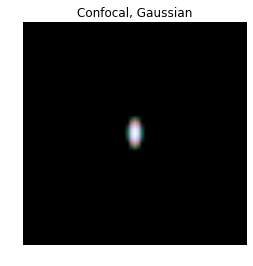

In [4]:
ax,im = obsvol.imshow(save=True)

In [5]:
print("%.5f, %.5f" % obsvol.sigma.ou)
print("%.5f, %.5f" % obsvol.sigma.um)

2.58832, 1.37059
0.18609, 0.08871


In [6]:
obsvol.pinhole.radius

{'au': 1.0077936038699273, 'ou': 7.725227836696213, 'px': 4.0, 'um': 0.5}

In [7]:
ph = (1.22*488)/1.2
ph

496.1333333333334

In [22]:
np.log10(obsvol.slice(0)).tofile("_test_slice.bin")

/Users/uqdmatt2/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


/Users/uqdmatt2/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app


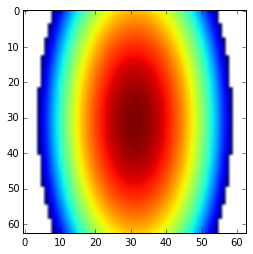

In [26]:
data = np.reshape(np.fromfile("_test_slice.bin"),(32,32))
imshow(psf.mirror_symmetry(np.log10(obsvol.data)),interpolation='bilinear')

In [27]:
im = Image.fromarray(data)
im = im.convert('RGB')
im.save("_test_slice.png")